# Word Frequencies

## Load Text File
Let's load your file from a local folder. Download your file and save it in the `data` folder from the locaction where you launched this Notebook. You might need a few libraries which you need to import. Usually all the imports are done in the first cell, but this notebook uses imports as and when you need them for your own understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize

In [2]:
with open('./data/carroll-alice.txt', 'r', encoding='utf-8-sig') as fo :
    alice = fo.readlines()

# alice=alice[28:]

## Write functions to separate and count words

In [3]:
def get_words_tokenized(text_list):
    words_list = []
    for text in text_list:
        words = word_tokenize(text)
        # words = [w.lower() for w in words]
        words_list.append(words)
    return words_list

In [4]:
def count_words(words_list):
    all_words = []
    for words in words_list :
        all_words.extend(words)
    unique_words = list(set(all_words))
    word_counts = [all_words.count(w) for w in unique_words]
    counts_df = pd.DataFrame({'word' : unique_words, 'count' : word_counts})
    return counts_df

In [5]:
def plot_words(df, max_words=40):
    df = df.sort_values(by=['count'], ascending=False)
    df = df[0:max_words]
    plt.figure(figsize=(4,int(max_words/5)), dpi=100)
    g=sns.barplot(y='word', x='count', data=df, color='gray')

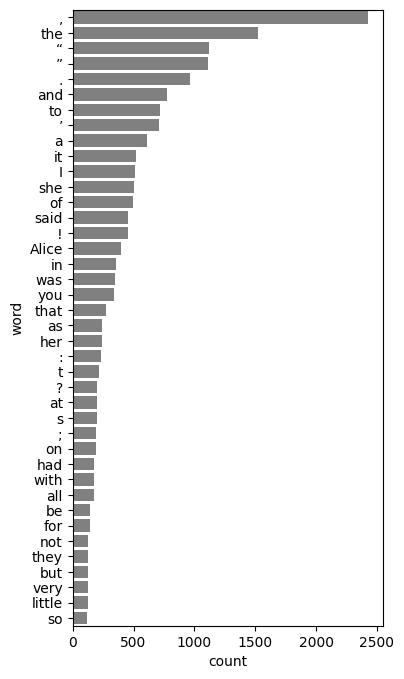

In [6]:
words = get_words_tokenized(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Remove Punctuations

In [7]:
import string
punctuations = string.punctuation + "’" + '“' + '”' +"‘"

def get_words_tokenized_nopunct(utterances, puncts=punctuations):
    utterance_words_list = []
    for utterance in utterances:
        words = word_tokenize(utterance)
        # words = [w.lower() for w in words]
        words_no_punct = [word for word in words if not word in punctuations]
        utterance_words_list.append(words_no_punct)
    return utterance_words_list

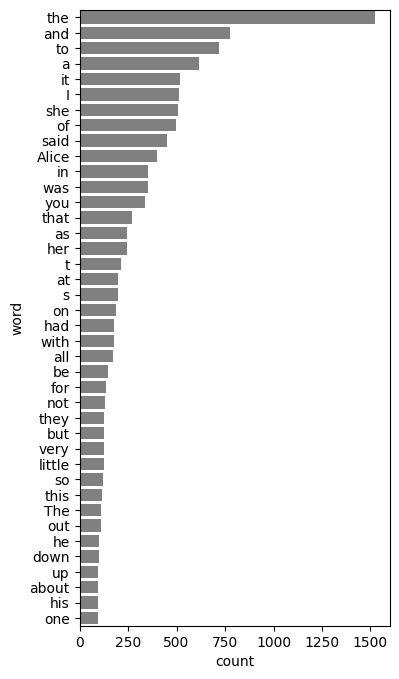

In [8]:
words = get_words_tokenized_nopunct(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Remove Stopwords

In [9]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # uncomment and run this line the first time you run this code.
stop_words = set(stopwords.words('english'))

In [10]:
def get_words_tokenized_nopunct_nostop(utterances, puncts=punctuations, stop_w=stop_words):
    utterance_words_list = []
    for utterance in utterances:
        words = word_tokenize(utterance.lower())
        words_no_punct = [word for word in words if (not word in punctuations) and (not word in stop_w)]
        utterance_words_list.append(words_no_punct)
    return utterance_words_list

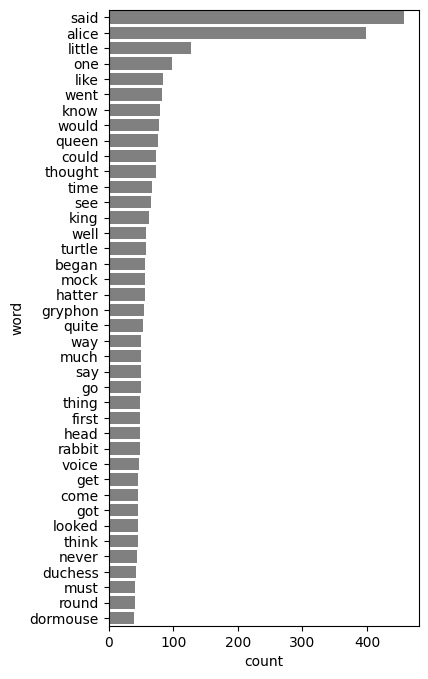

In [11]:
words = get_words_tokenized_nopunct_nostop(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Optional: Generate WordCloud

In [12]:
word_freq = word_counts_df.set_index('word').to_dict()['count']

(-0.5, 1599.5, 899.5, -0.5)

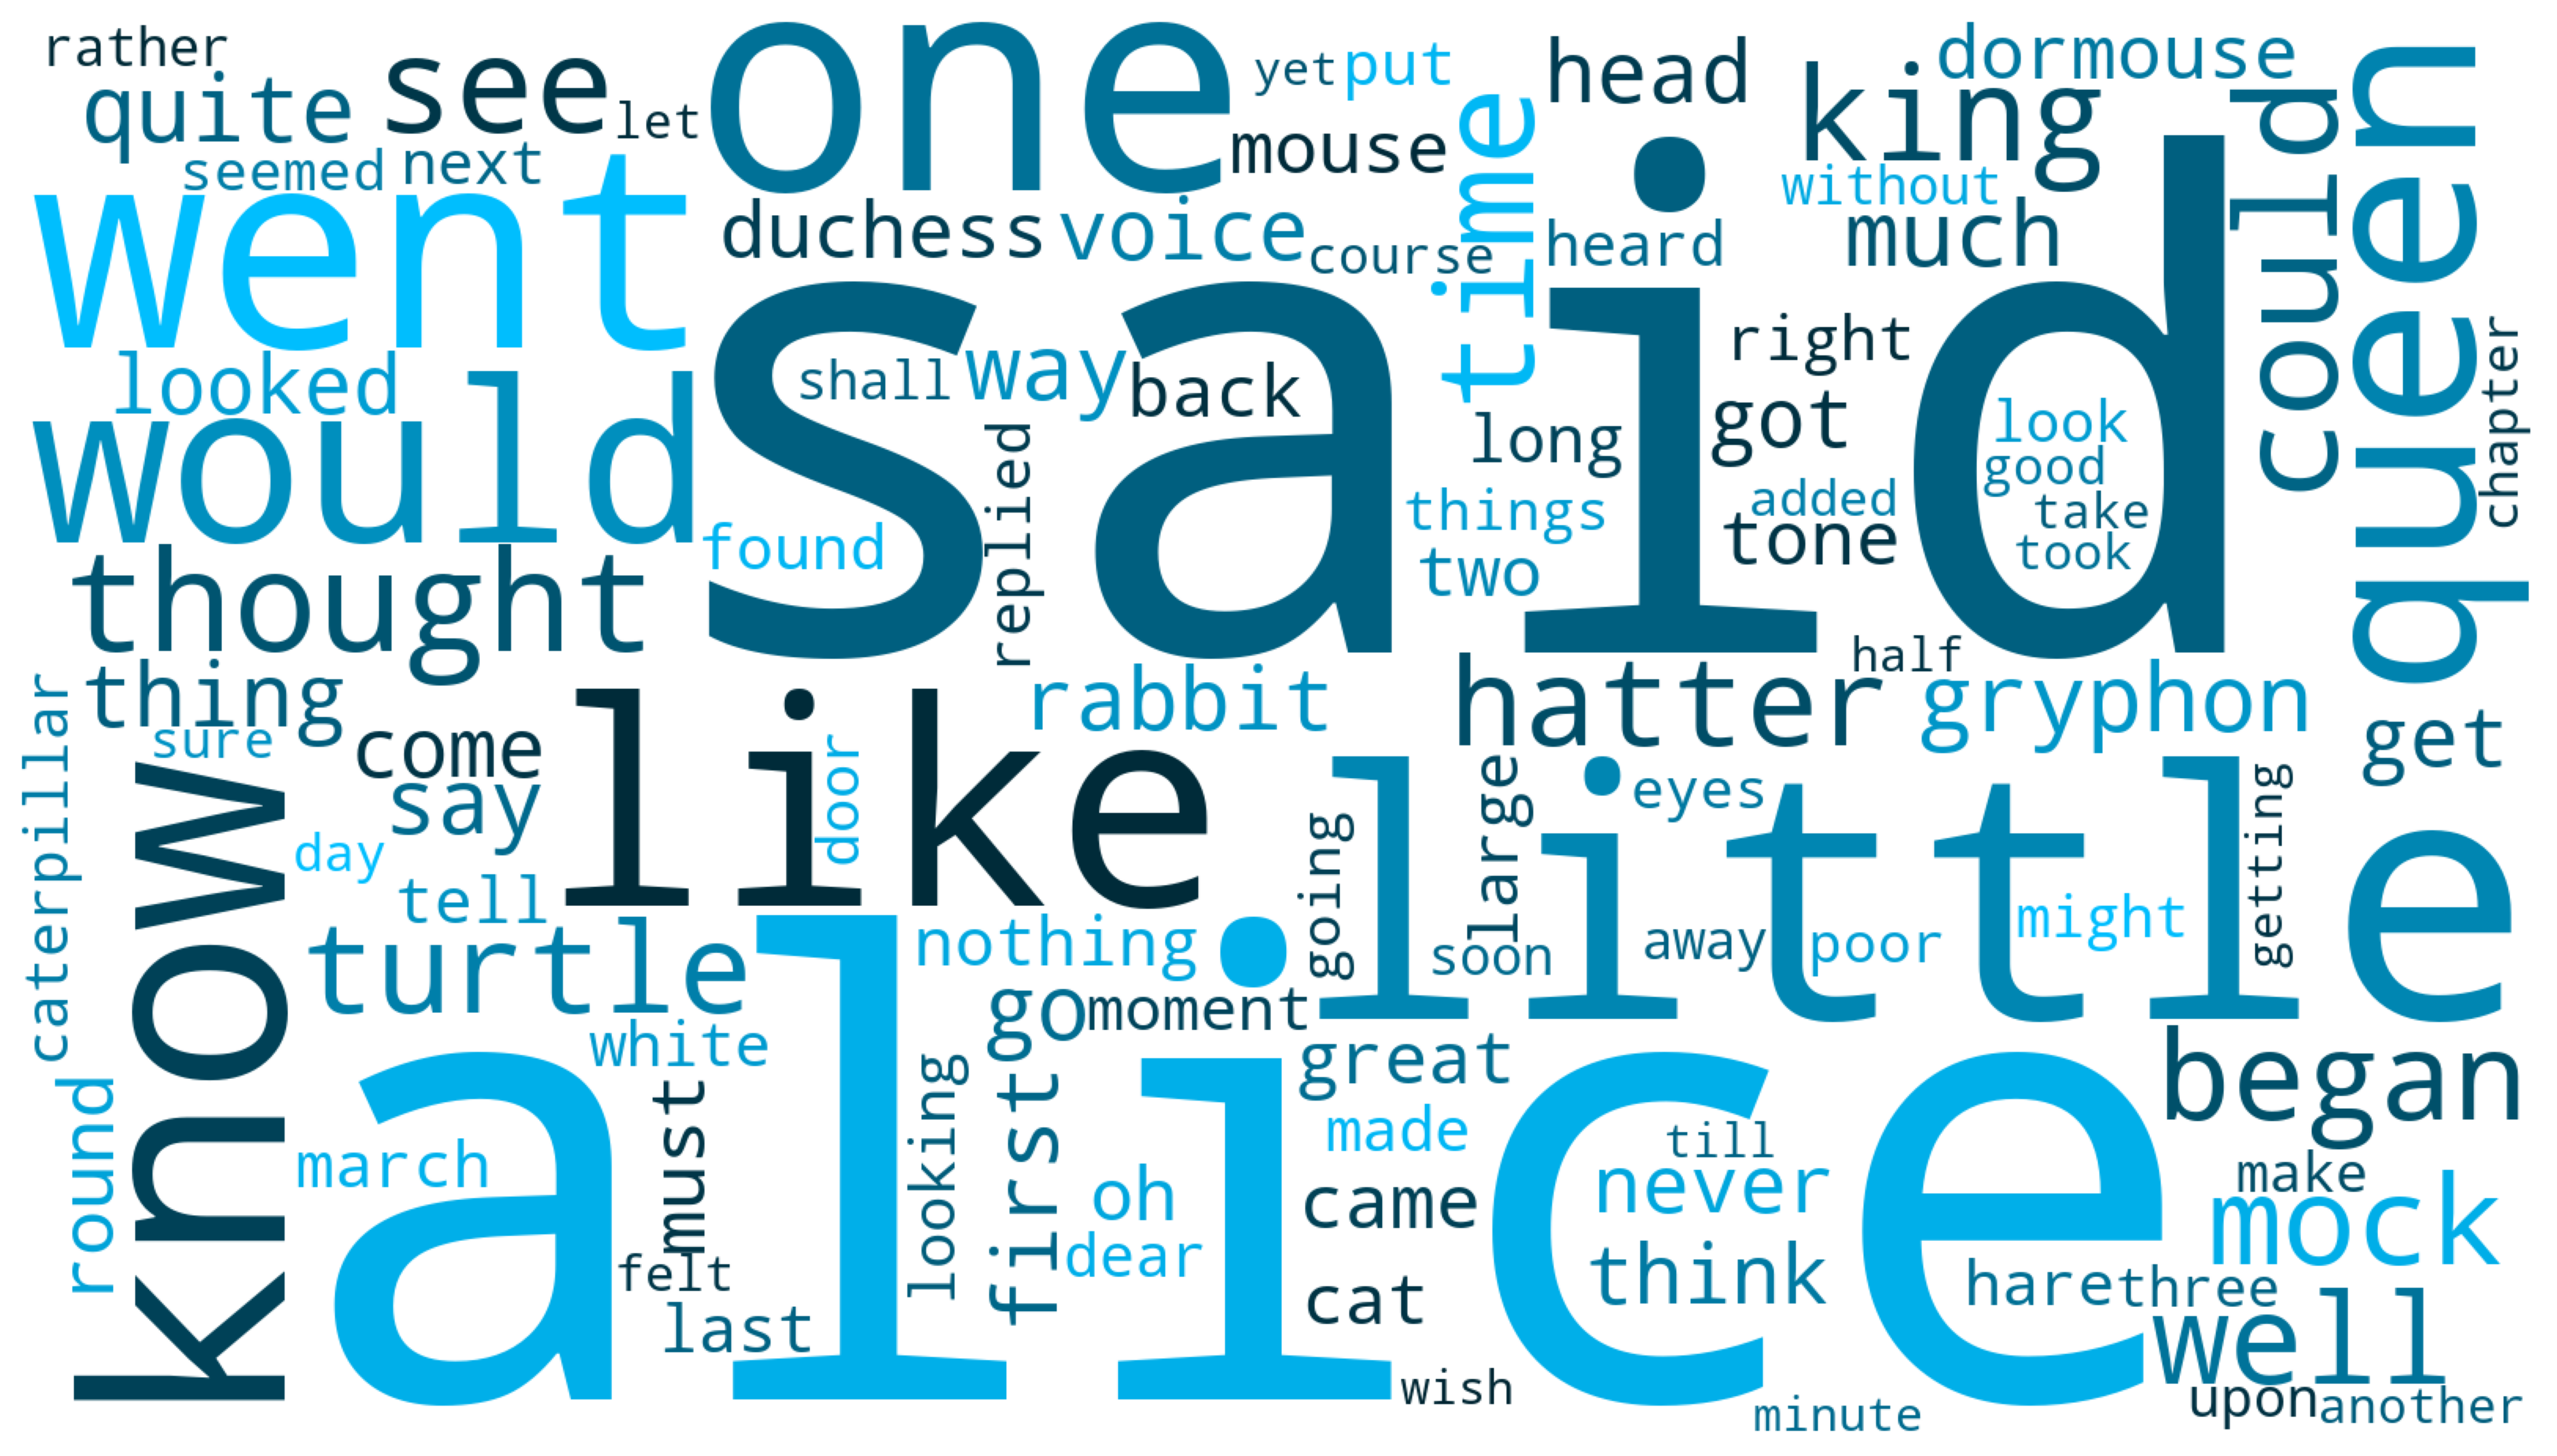

In [13]:
import wordcloud
plt.figure(figsize=(16,9), dpi=300)
wc = wordcloud.WordCloud(width=1600, height=900,
                       background_color="white",
                       color_func = wordcloud.get_single_color_func('deepskyblue'),
                       max_words=100)

wc.generate_from_frequencies(word_freq)
plt.imshow(wc)
plt.axis('off')

## Concordances or Keywords in Context (KWIC)

In [15]:
from nltk.text import Text
alice_text = ' '.join(alice)
tokens = word_tokenize(alice_text)
textList = Text(tokens)
textList.concordance('said', width=55, lines=25)

Displaying 25 of 457 matches:
len by this time ? ” she said aloud . “ I must be gett
 was not here before , ” said Alice , ) and round the 
 ’ ll look first , ” she said , “ and see whether it ’
at a curious feeling ! ” said Alice ; “ I must be shut
might end , you know , ” said Alice to herself , “ in 
 in crying like that ! ” said Alice to herself , rathe
Well , I ’ ll eat it , ” said Alice , “ and if it make
e ate a little bit , and said anxiously to herself , “
 ashamed of yourself , ” said Alice , “ a great girl l
re I ’ m not Ada , ” she said , “ for her hair goes in
 not the right words , ” said poor Alice , and her eye
ll alone here ! ” As she said this she looked down at 
was_ a narrow escape ! ” said Alice , a good deal frig
 , that it is ! ” As she said these words her foot sli
 back by railway , ” she said to herself . ( Alice had
dn ’ t cried so much ! ” said Alice , as she swam abou
its little eyes , but it said nothing . “ Perhaps it d
“ Well , perhaps not , ” said Alice